#### @author: Ameer Eleyan
#### At: 1/17/2022   10:30 PM

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp


In [158]:
# upload data set and , and remove spaces if exists
dataSet = pd.read_csv('Dataset.csv')
dataSet.replace('(^\s+|\s+$)', '', regex=True, inplace=True)  # to remove spaces

In [159]:
dataSet.head()

,ID,x,y,label
0,0,9.840393,-4.424873,0
1,1,9.875227,-5.837095,0
2,2,7.584461,-2.197050,1
3,3,7.575756,-1.531964,1
4,4,7.271927,-1.409147,1


In [160]:
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,500.0,249.500000,144.481833,0.000000,124.750000,249.500000,374.250000,499.000000
x,500.0,8.771894,1.283663,5.170321,7.804432,8.703977,9.724753,11.902165
y,500.0,-3.126132,1.800966,-7.801389,-4.666195,-3.128388,-1.605270,1.183028
label,500.0,0.500000,0.500501,0.000000,0.000000,0.500000,1.000000,1.000000


In [161]:
#delete rows with zero values(dataSet)
dataSet[dataSet.columns[(dataSet!=0).any(axis = 0)]]

,ID,x,y,label
0,0,9.840393,-4.424873,0
1,1,9.875227,-5.837095,0
2,2,7.584461,-2.197050,1
3,3,7.575756,-1.531964,1
4,4,7.271927,-1.409147,1
...,...,...,...,...
495,495,9.807510,-0.919519,1
496,496,10.231378,-3.146160,0
497,497,7.277396,0.037083,1
498,498,11.540562,-5.148347,0


In [162]:
# check if there are no missing values in training_data_set
dataSet.isnull().values.sum()

0

In [163]:
# display corr between all independent variables with target variables(status)
corr_df = dataSet.corr()
corr_df

,ID,x,y,label
ID,1.000000,-0.007025,0.020086,0.004240
x,-0.007025,1.000000,-0.561598,-0.658355
y,0.020086,-0.561598,1.000000,0.841335
label,0.004240,-0.658355,0.841335,1.000000


In [164]:
dataSet.duplicated().sum()

0

In [165]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      500 non-null    int64  
 1   x       500 non-null    float64
 2   y       500 non-null    float64
 3   label   500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [166]:
# drop ID column
dataSet = dataSet.drop('ID', axis=1)


In [167]:
dataSet

,x,y,label
0,9.840393,-4.424873,0
1,9.875227,-5.837095,0
2,7.584461,-2.197050,1
3,7.575756,-1.531964,1
4,7.271927,-1.409147,1
...,...,...,...
495,9.807510,-0.919519,1
496,10.231378,-3.146160,0
497,7.277396,0.037083,1
498,11.540562,-5.148347,0


In [168]:
# shuffle dataset
shuffled_df = dataSet.sample(frac=1, random_state=3)

In [169]:
training_data_set=shuffled_df.sample(frac=0.8,random_state=20) #random state is a seed value
testing_data_set=shuffled_df.drop(training_data_set.index)

In [170]:
training_data_set

,x,y,label
149,7.978469,-4.080734,0
103,5.915883,-3.830150,1
273,8.170728,-0.286542,1
138,10.315551,-1.502095,1
311,6.923716,-1.499944,1
...,...,...,...
131,9.834473,-5.627677,0
398,11.456215,-3.832154,0
213,8.759492,-3.361122,1
118,10.916757,-5.219581,0


In [171]:
training_data_set.shape

(400, 3)

In [172]:
testing_data_set.shape

(100, 3)

<AxesSubplot:xlabel='x', ylabel='label'>

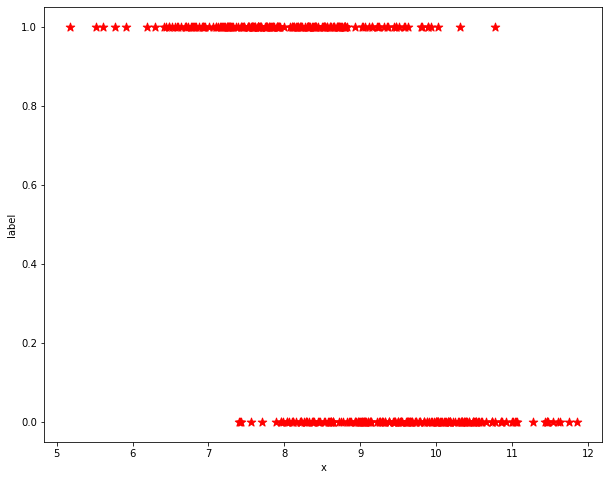

In [173]:
training_data_set.plot.scatter(x="x", y="label", color="red", marker="*", s=80)

<AxesSubplot:xlabel='y', ylabel='label'>

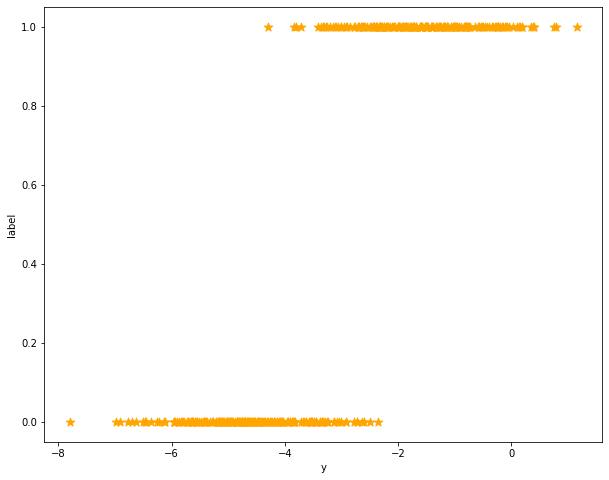

In [174]:
training_data_set.plot.scatter(x="y", y="label", color="orange",marker="*", s=80)

In [175]:
x_train = training_data_set.iloc[:,0:2] #independent columns
y_train = training_data_set.iloc[:,-1] #target column label
x_test = testing_data_set.iloc[:,0:2]
y_test = testing_data_set.iloc[:,-1]

## Random Forest

In [176]:
rf_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 10)
rf_model.fit(x_train, y_train)
rf_model_prd = rf_model.predict(x_test)

In [177]:
print('RF Model score: %.1f' % (rf_model.score(x_train, y_train)*100),'%')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,rf_model_prd)
print('RF Accuracy: %.1f' % (accuracy*100),'%')
# precision tp / (tp + fp)
precision = precision_score(y_test,rf_model_prd)
print('RF Precision: %.1f' % (precision*100),'%')
# recall: tp / (tp + fn)
recall = recall_score(y_test,rf_model_prd)
print('RF Recall: %.1f' % (recall*100),'%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,rf_model_prd)
print('RF F1 score: %.1f' % (f1*100),'%')

# estimate bias and variance
mse, bias, var = bias_variance_decomp(rf_model, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse', num_rounds=50, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


RF Model score: 100.0 %
RF Accuracy: 99.0 %
RF Precision: 100.0 %
RF Recall: 98.0 %
RF F1 score: 99.0 %
MSE: 0.015
Bias: 0.006
Variance: 0.009


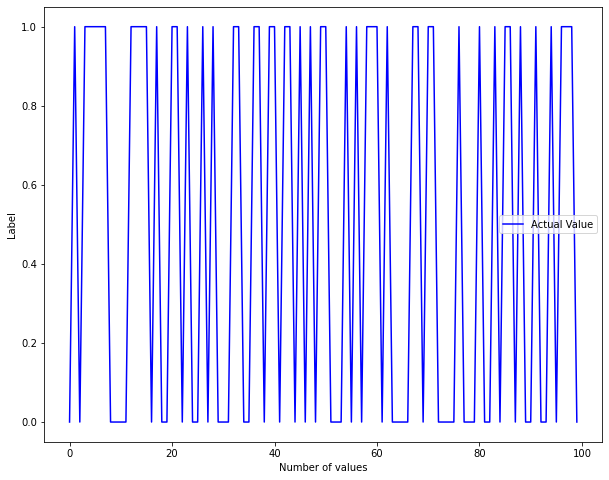

In [178]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(y_test.to_numpy(), color='blue')
plt.xlabel('Number of values')
plt.ylabel('Label')
plt.legend(['Actual Value'])
plt.show()

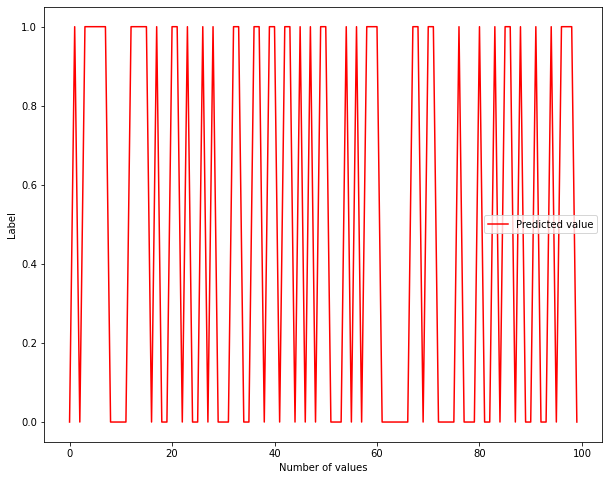

In [179]:
plt.plot(rf_model_prd, color='red')
plt.xlabel('Number of values')
plt.ylabel('Label')
plt.legend(['Predicted value'])
plt.show()

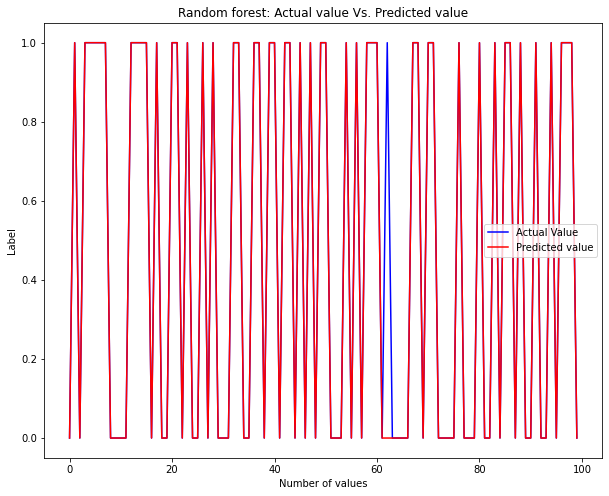

In [180]:
plt.plot(y_test.to_numpy(), color='blue')
plt.plot(rf_model_prd, color='red')
plt.xlabel('Number of values')
plt.ylabel('Label')
plt.title("Random forest: Actual value Vs. Predicted value")
plt.legend(['Actual Value','Predicted value'])
plt.show()


## C4.5 Decision tree

In [181]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)
tr_prd = tree.predict(x_test)


In [182]:
print('RF Model score: %.1f' % (tree.score(x_train, y_train)*100), '%')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, tr_prd)
print('C4.5 Accuracy: %.1f' % (accuracy*100), '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, tr_prd)
print('C4.5 Precision: %.1f' % (precision*100), '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, tr_prd)
print('C4.5 Recall: %.1f' % (recall*100), '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, tr_prd)
print('C4.5 F1 score: %.1f' % (f1*100), '%')

# estimate bias and variance
mse, bias, var = bias_variance_decomp(tree, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse', num_rounds=50, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


RF Model score: 100.0 %
C4.5 Accuracy: 99.0 %
C4.5 Precision: 100.0 %
C4.5 Recall: 98.0 %
C4.5 F1 score: 99.0 %
MSE: 0.023
Bias: 0.007
Variance: 0.016


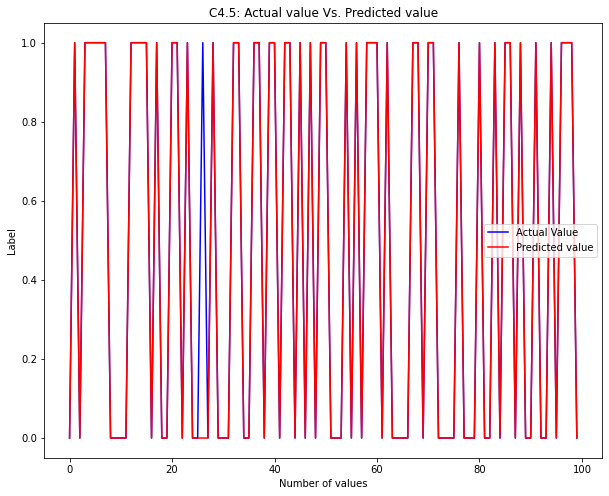

In [183]:
plt.plot(y_test.to_numpy(), color='blue')
plt.plot(tr_prd, color='red')
plt.xlabel('Number of values')
plt.ylabel('Label')
plt.title("C4.5: Actual value Vs. Predicted value")
plt.legend(['Actual Value', 'Predicted value'])
plt.show()
